In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('FuelConsumption (1).csv')

In [5]:
print("Columns in dataset:\n", df.columns.tolist())

Columns in dataset:
 ['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS ']


In [7]:
df.dropna(inplace=True)

In [8]:
df = pd.get_dummies(df, columns=['FUEL', 'TRANSMISSION', 'VEHICLE CLASS', 'MAKE'], drop_first=True)


In [9]:
X = df.drop(['COEMISSIONS ', 'MODEL'], axis=1)
y = df['COEMISSIONS ']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [12]:
y_pred = model.predict(X_test)


In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Decision Tree Regressor Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score (Accuracy-like): {r2:.4f} ({r2*100:.2f}%)")


✅ Decision Tree Regressor Results:
Mean Absolute Error (MAE): 5.02
Mean Squared Error (MSE): 108.66
R² Score (Accuracy-like): 0.9792 (97.92%)


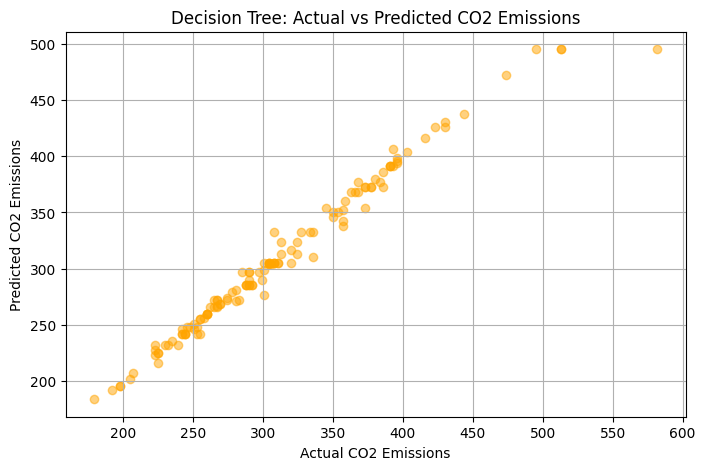

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='orange', alpha=0.5)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Decision Tree: Actual vs Predicted CO2 Emissions')
plt.grid(True)
plt.show()